# US Car Accidents 2011 - EDA

# 1. Introduction

This notebook explores the US car accident data for 2011.
We aim to find patterns related to:
- Time of the day
- Weather conditions
- Road conditions
- Accident severity


In [2]:
# 2. Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8")  # For Matplotlib 3.6+

In [3]:
# 3. Data Loading
df = pd.read_csv("US_car_accidents_2011.csv")
df.head()

,State,Atmosphere,Crash Datetime,Fatalities in crash,Roadway,Age,Alcohol Results,Person Type,Drug Involvement,Race,Gender,Injury Severity,Crash Date.year,Crash Date.month,Crash Date.day-of-month,Crash Date.day-of-week
0,Alaska,Sleet,05-01-2011 14:33,1,Rural-Principal Arterial-Interstate,27.0,0.0,Driver of a Motor Vehicle In-Transport,Yes,NaN,Male,Non-incapacitating Evident Injury (B),2011,1,5,3
1,Alaska,Rain,05-01-2011 23:27,1,Rural-Principal Arterial-Interstate,60.0,0.0,Driver of a Motor Vehicle In-Transport,No,White,Female,Fatal Injury (K),2011,1,5,3
2,Arizona,Thunderstorm,01-01-2011 07:51,1,Urban-Other Principal Arterial,24.0,NaN,Passenger of a Motor Vehicle In-Transport,Not Reported,NaN,Female,No Injury (O),2011,1,1,6
3,Arizona,Clear,01-01-2011 21:17,1,Urban-Other Principal Arterial,27.0,0.0,Driver of a Motor Vehicle In-Transport,No,NaN,Male,No Injury (O),2011,1,1,6
4,Arizona,Dust Storm,01-01-2011 04:16,1,Urban-Other Principal Arterial,82.0,0.0,Pedestrian,No,Unknown,Female,Fatal Injury (K),2011,1,1,6


In [4]:
# 4. Data Cleaning
# Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    4999 non-null   object 
 1   Atmosphere               4999 non-null   object 
 2   Crash Datetime           4999 non-null   object 
 3   Fatalities in crash      4999 non-null   int64  
 4   Roadway                  4999 non-null   object 
 5   Age                      4929 non-null   float64
 6   Alcohol Results          2293 non-null   float64
 7   Person Type              4999 non-null   object 
 8   Drug Involvement         4999 non-null   object 
 9   Race                     2320 non-null   object 
 10  Gender                   4999 non-null   object 
 11  Injury Severity          4999 non-null   object 
 12  Crash Date.year          4999 non-null   int64  
 13  Crash Date.month         4999 non-null   int64  
 14  Crash Date.day-of-month 

In [6]:
# Check for missing values
missing = df.isnull().sum()
missing[missing > 0]

# Drop rows with missing Crash Datetime (if any)
df.dropna(subset=['Crash Datetime'], inplace=True)

# Convert Crash Datetime to datetime object
df['Crash Datetime'] = pd.to_datetime(df['Crash Datetime'], dayfirst=True, errors='coerce')
df.dropna(subset=['Crash Datetime'], inplace=True)


# Fill NA in categorical columns with 'Unknown'
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Drop exact duplicates
df.drop_duplicates(inplace=True)

In [8]:
# 5. Feature Engineering
# Extract datetime features
df['Hour'] = df['Crash Datetime'].dt.hour
df['Weekday'] = df['Crash Datetime'].dt.day_name()

# Time of day category
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time of Day'] = df['Hour'].apply(time_of_day)

# Simplify weather
df['Weather Simple'] = df['Atmosphere'].replace({
    "Thunderstorm": "Storm",
    "Dust Storm": "Storm",
    "Fog": "Low Visibility",
    "Sleet": "Snow",
    "Hail": "Snow",
    "Rain": "Rain",
    "Snow": "Snow",
    "Clear": "Clear",
    "Cloudy": "Cloudy",
    "Windy": "Windy"
})

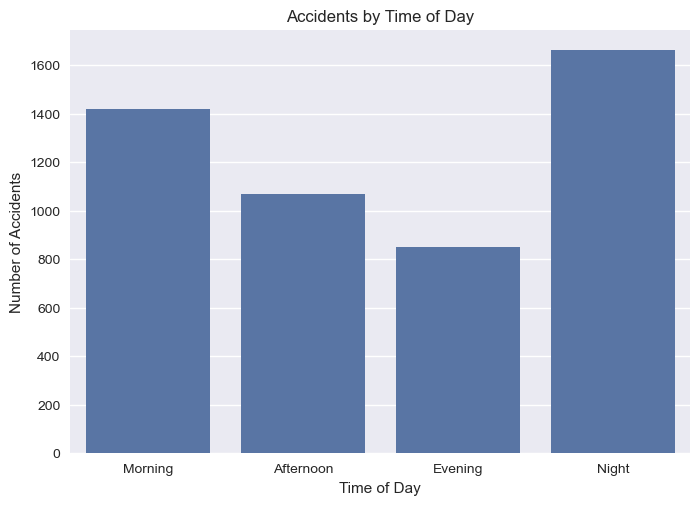

In [9]:
# 6. Exploratory Data Analysis (EDA)

# A. Accidents by Time of Day
sns.countplot(x='Time of Day', data=df, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title("Accidents by Time of Day")
plt.ylabel("Number of Accidents")
plt.show()

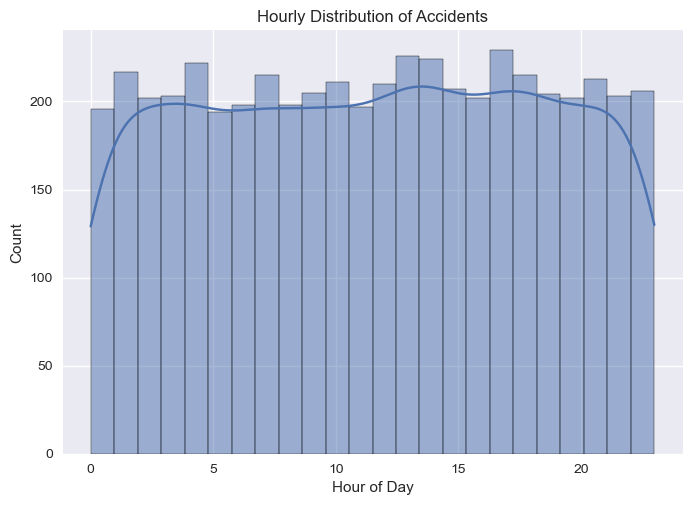

In [10]:
# B. Hourly Distribution
sns.histplot(df['Hour'], bins=24, kde=True)
plt.title("Hourly Distribution of Accidents")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

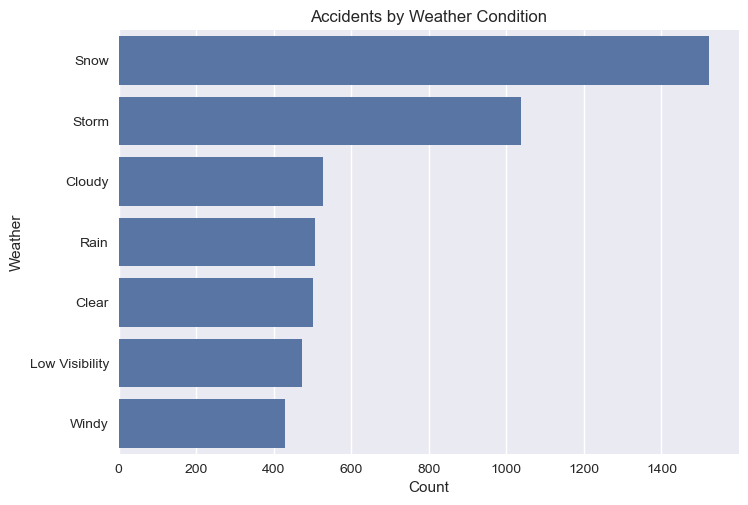

In [11]:
# C. Weather Conditions
sns.countplot(y='Weather Simple', data=df, order=df['Weather Simple'].value_counts().index)
plt.title("Accidents by Weather Condition")
plt.xlabel("Count")
plt.ylabel("Weather")
plt.show()

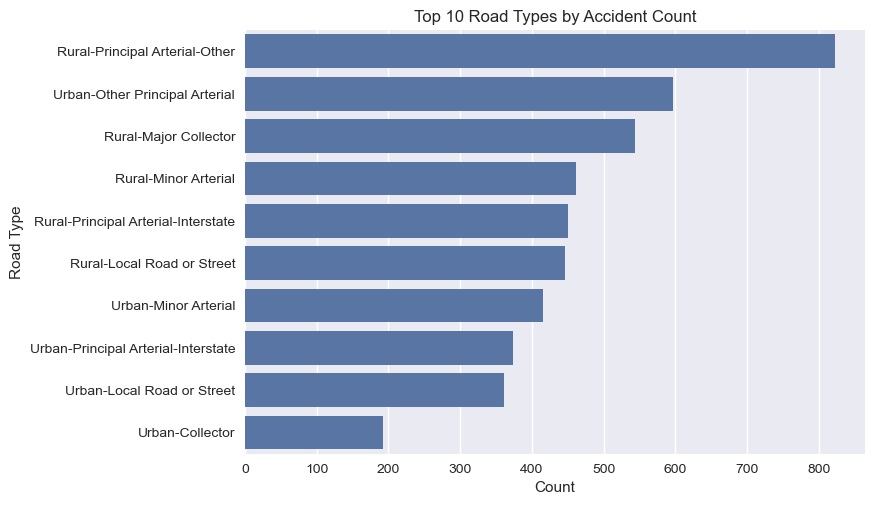

In [12]:
# D. Road Type Analysis
top_roads = df['Roadway'].value_counts().head(10)
sns.barplot(x=top_roads.values, y=top_roads.index)
plt.title("Top 10 Road Types by Accident Count")
plt.xlabel("Count")
plt.ylabel("Road Type")
plt.show()

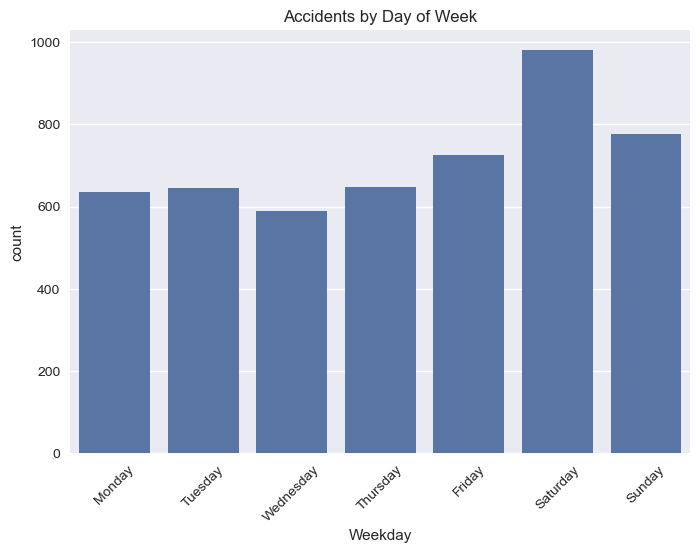

In [13]:
# E. Weekday Distribution
sns.countplot(x='Weekday', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Accidents by Day of Week")
plt.xticks(rotation=45)
plt.show()

In [14]:
# 7.  Accident Hotspots
if 'Latitude' in df.columns and 'Longitude' in df.columns:
    fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Fatalities in crash',
                            radius=10, center=dict(lat=37.0902, lon=-95.7129),
                            zoom=3, mapbox_style="stamen-terrain")
    fig.show()
else:
    print("Location data not available.")

Location data not available.


# 8. Key Insights

- Most accidents occur during the afternoon and evening.
- Clear and cloudy conditions account for the majority of crashes,
  but rain and snow show increased severity.
- Certain road types (like interstates and arterials) are more prone to accidents.
- Weekends have slightly higher accident volumes.